In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

In [7]:
# Plotting the accuracy and loss
def plot_training_history(history):
    # Extract data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Found 7771 images belonging to 3 classes.
Found 2784 images belonging to 3 classes.
Found 1305 images belonging to 3 classes.
Class Indices Mapping: {'bao': 0, 'random': 1, 'uni_sushi': 2}
Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 112s 453ms/step - accuracy: 0.8262 - loss: 0.5609 - val_accuracy: 0.9415 - val_loss: 0.1819
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 117s 477ms/step - accuracy: 0.9071 - loss: 0.2502 - val_accuracy: 0.9526 - val_loss: 0.1375
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 111s 453ms/step - accuracy: 0.9302 - loss: 0.1940 - val_accuracy: 0.8908 - val_loss: 0.2453
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 111s 452ms/step - accuracy: 0.9274 - loss: 0.2084 - val_accuracy: 0.9752 - val_loss: 0.0723
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 105s 428ms/step - accuracy: 0.9514 - loss: 0.1294 - val_accuracy: 0.9813 - val_loss: 0.0590
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 105s 429ms/step - accuracy: 0.9588 - loss: 0.1178 - val_accuracy: 0.9684 - val_loss: 0.0778
Epoch 7/50
243/243 

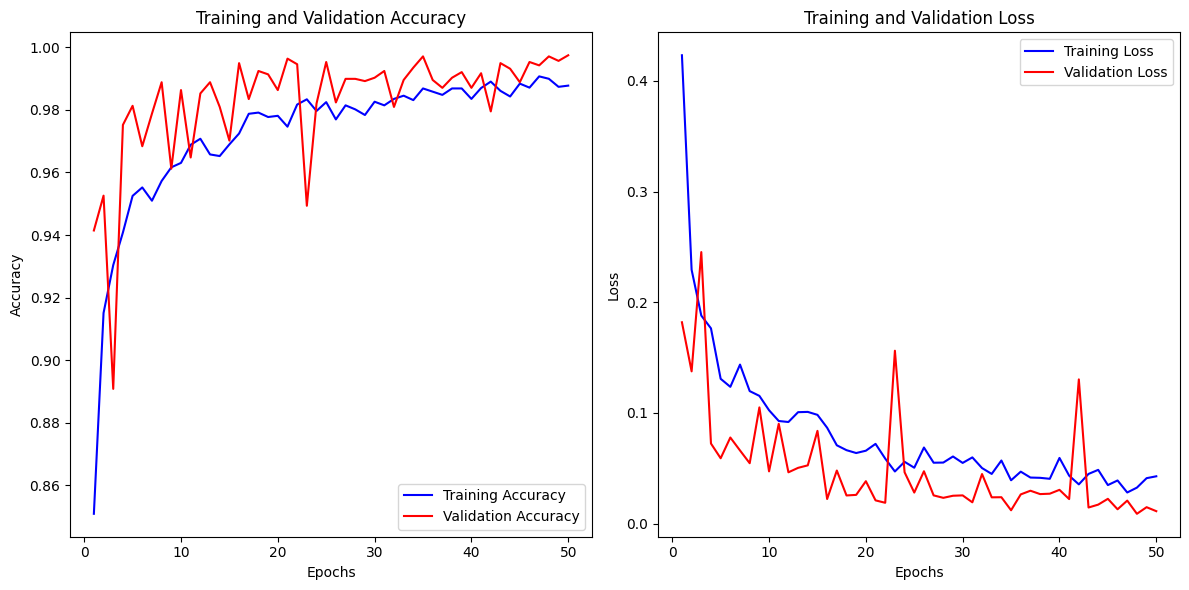

In [8]:
# Define paths
base_dir = "C:/Users/sunda/OneDrive/Documents/ML&AI LABS/MLAI_Project/Dataset"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Image size and batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Data preparation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = valid_test_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Capture class mappings
class_indices = train_generator.class_indices

print("Class Indices Mapping:", class_indices)

# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 classes: Bao, Uni Sushi, Random
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')
plot_training_history(history)

In [9]:
model.save('C:/Users/sunda/OneDrive/Documents/ML&AI LABS/MLAI_Project/Models/model01_theyan.h5')